# Analyzing Donation Timeline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
df = pd.read_excel('DonationsC5LA.xlsx')
df.head()

,Masked Account ID,Maked Primary Campaign,Stage,Account Type,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount
0,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.00
1,1,NaN,Closed Won,Household,90069,Q3-2023,7/14/2023,200000.00
2,1,NaN,Closed Won,Household,90069,Q3-2019,7/17/2019,5000028.69
3,1,NaN,Closed Won,Household,90069,Q1-2019,3/12/2019,320000.00
4,1,NaN,Closed Won,Household,90069,Q2-2020,4/27/2020,220000.00


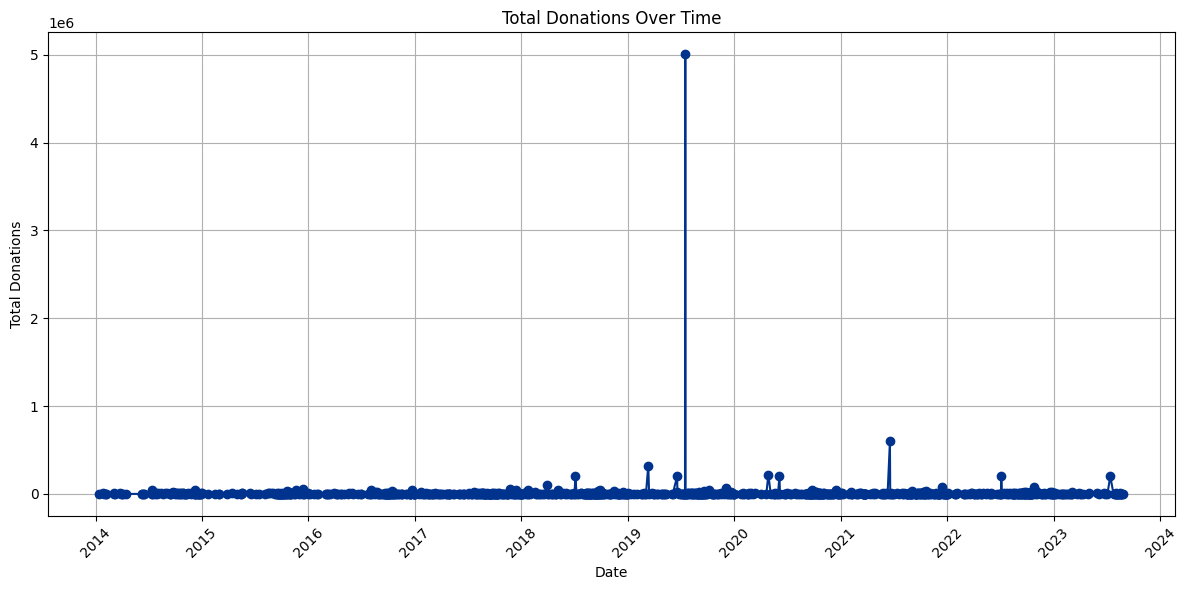

In [3]:
# Ensure the 'Close Date' is in datetime format
df['Close Date'] = pd.to_datetime(df['Close Date'], errors='coerce')

# Group the data by 'Close Date' and calculate total donations for each date
donation_timeline = df.groupby(df['Close Date'].dt.date)['Amount'].sum().reset_index()

# Rename the columns for clarity
donation_timeline.columns = ['Date', 'Total Donations']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(donation_timeline['Date'], donation_timeline['Total Donations'], marker='o', color='#00338D')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Total Donations')
plt.title('Total Donations Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

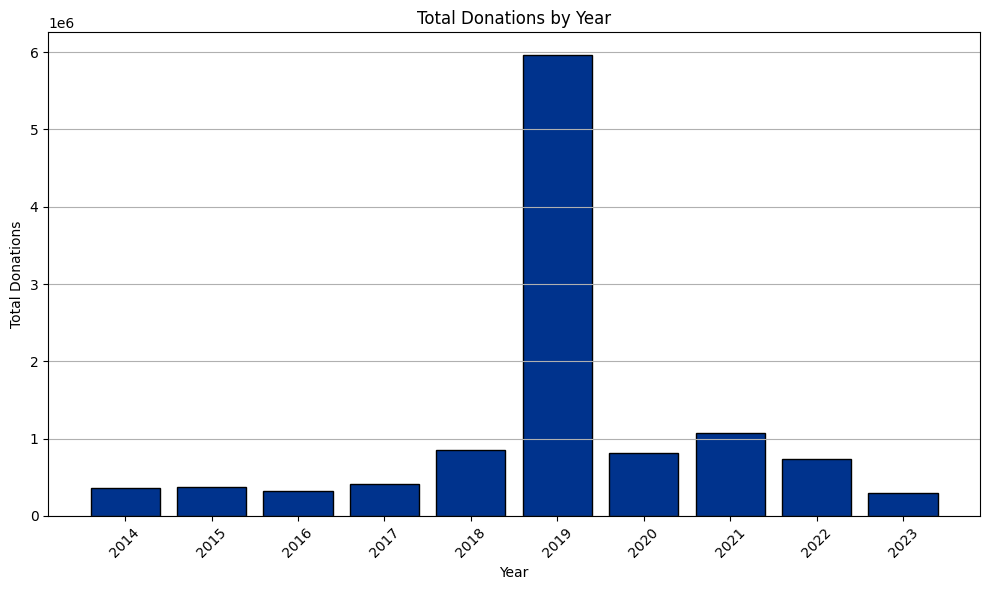

In [4]:
# Ensure the 'Close Date' is in datetime format
df['Close Date'] = pd.to_datetime(df['Close Date'], errors='coerce')

# Extract the year from 'Close Date' and create a new column
df['Year'] = df['Close Date'].dt.year

# Group the data by 'Year' and calculate total donations for each year
yearly_donations = df.groupby('Year')['Amount'].sum().reset_index()

# Rename the columns for clarity
yearly_donations.columns = ['Year', 'Total Donations']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_donations['Year'].astype(str), yearly_donations['Total Donations'], color='#00338D', edgecolor='black')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Donations')
plt.title('Total Donations by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

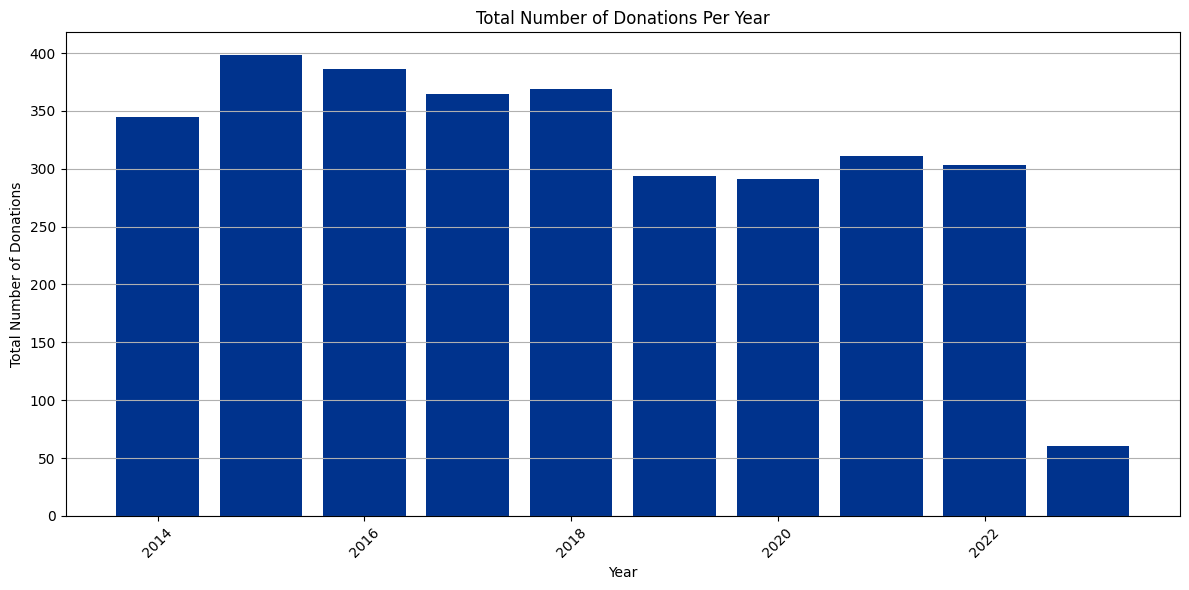

In [6]:
# Ensure the 'Close Date' is in datetime format
df['Close Date'] = pd.to_datetime(df['Close Date'], errors='coerce')

# Extract the year from 'Close Date'
df['Year'] = df['Close Date'].dt.year

# Group the data by year and count the number of donations for each year
donations_per_year = df.groupby('Year').size().reset_index(name='Total Donations Count')

# Rename the columns for clarity
donations_per_year.columns = ['Year', 'Total Donations Count']

# Create a bar plot for total number of donations per year
plt.figure(figsize=(12, 6))
plt.bar(donations_per_year['Year'], donations_per_year['Total Donations Count'], color='#00338D')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Number of Donations')
plt.title('Total Number of Donations Per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()